## 5 Optical pulses

### 5.1 Model a laser pulse

Product of very fast oscillation $(\omega_0\sim 100 \; \text{THz})$ with a Gaussian curve $(\sigma \sim 1 \; \text{ps})$.

$$\sin{(\omega_0 t)} \cdot e^{-\frac{t^2}{2\sigma^2}}$$

Create **time vector** going from −50ps to 50ps, and laser representation pulse.

We will use an oscillating frequency of 10 THz (THz = 1/ps) in order to not saturate the memory of the computer.

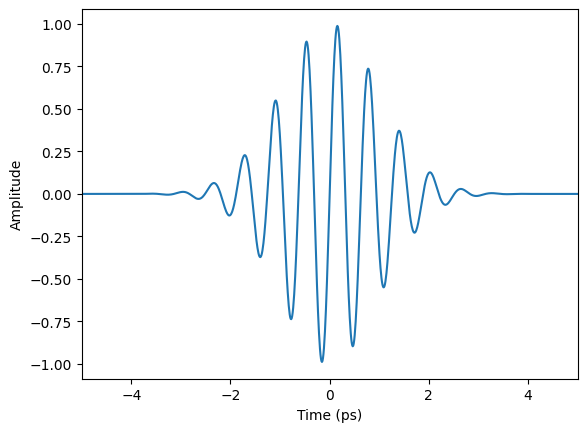

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the time axis
t = np.linspace(-50, 50, 10000)  # in ps

# Define the pulse
omega_0 = 10        # in THz (10 THz instead 100 THz in order to not saturate memory)
sigma = 1           # in ps
pulse = np.sin(omega_0 * t) * np.exp(-t**2/(2 * sigma ** 2))

# Plot pulse
plt.plot(t, pulse)
plt.xlabel('Time (ps)')
plt.ylabel('Amplitude')
plt.xlim(-5, 5)
plt.show()

### 5.2 Calculate the FT

Build frequency axis and plot amplitude and phase spectra.

One can use the `unwrap` function for the latter.

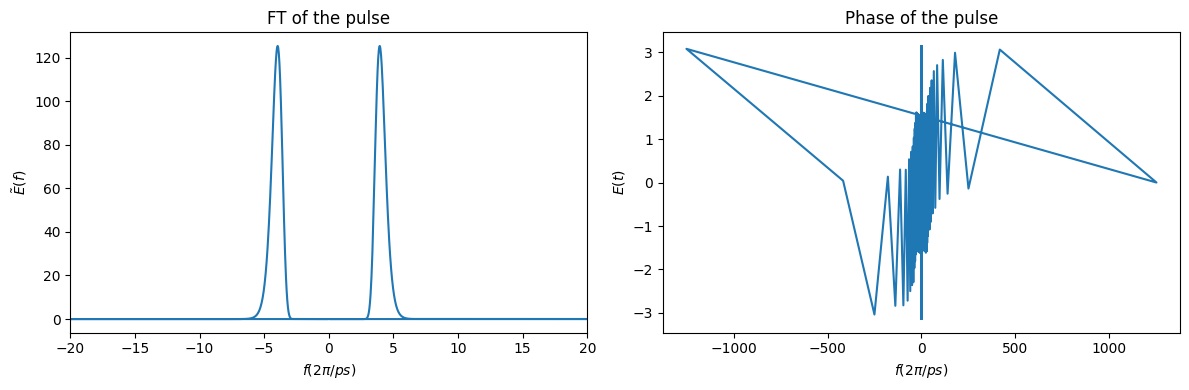

In [2]:
# Build frequency axis
freq_ax = 2 * np.pi / t

# Compute the Fourier transform
pulse_ft = np.fft.fftshift(np.fft.fft(pulse))

# Plot the pulse and its phase frequencies
plt.figure(figsize=(12, 4)) 
plt.subplot(121)
plt.plot(freq_ax, np.abs(pulse_ft))
plt.xlabel(r'$f (2 \pi / ps$)')
plt.ylabel(r'$\tilde{E} (f)$')
plt.title('FT of the pulse')
plt.xlim(-20, 20)
plt.subplot(122)
plt.plot(freq_ax, np.angle(pulse_ft))
plt.xlabel(r'$f (2 \pi / ps$)')
plt.ylabel(r'$E(t)$')
plt.title('Phase of the pulse')
plt.tight_layout()
plt.show()

### 5.3 PSD

In experiments, one can **only** record the power spectral density (PSD) of an optical signal
using a spectrometer, therefore, the phase information is lost. Draw the PSD of the modelled pulse signal.

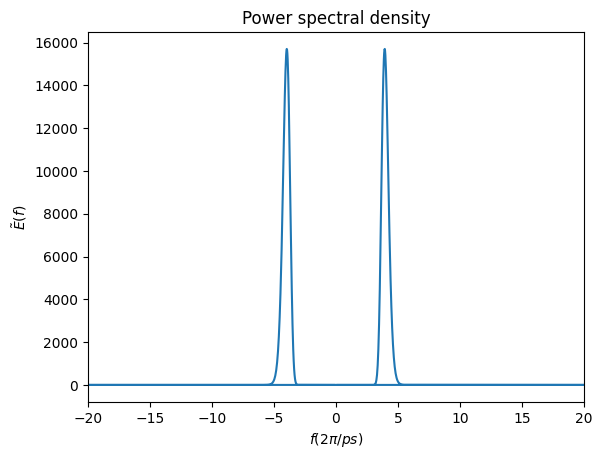

In [3]:
# Power spectral density function
PSD = np.abs(pulse_ft) ** 2

# Plot the PSD
plt.plot(freq_ax, PSD)
plt.xlabel(r'$f (2 \pi / ps$)')
plt.ylabel(r'$\tilde{E} (f)$')
plt.title('Power spectral density')
plt.xlim(-20, 20)
plt.show()


### 5.4 Same analysis on 2 pulses delayed by 6 ps

Same frequency for both, **phase difference $\phi$ arbitrary** set.

Discuss the shape of the PSD when the delay and phase are **changed**.
#### Can these features be seen using experimental techniques? Justify that this phenomenon can be called interferences.

Phase value:  3.448296944257913  rad


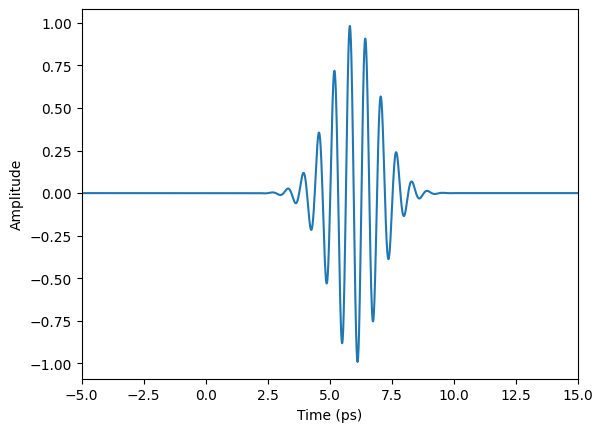

In [8]:
# Delayed pulse
np.random.seed(0)  # in order to have the same random phase
phase = np.random.rand() * 2 * np.pi   # in rad
print('Phase value: ', phase, ' rad')
t_delay = 6     # in ps
pulse_delayed = np.sin(omega_0 * (t - t_delay) + phase) * np.exp(-(t - t_delay)**2/(2 * sigma ** 2))

# Plot the delayed pulse
plt.plot(t, pulse_delayed)
plt.xlabel('Time (ps)')
plt.ylabel('Amplitude')
plt.xlim(-5, 15)
plt.show()

### 5.5 Autocorrilation
Use `xcorr` for this laser signal with 2 pulses.

Plot the result and build the appropriate x-axis array. What is the other way to calculate the autocorrelation? Show thanks to Octave that both methods give the same result.